In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('HPG Historical Data.csv')
df1=df.reset_index()['Price']
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)


Epoch 1/100


c:\Users\hangt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1035
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8482e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0750e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.3739e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.9384e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.7568e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2470e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.5147e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2961e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.1896e-04
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.2520e-04
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.2243e-04
Epoch 15/100
17/17 ━━━━━━

In [2]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)
# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)
# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Testing RMSE: 213.12288027029098
Testing MAE: 139.99208984374988
Testing MAPE: 0.012200554968556546


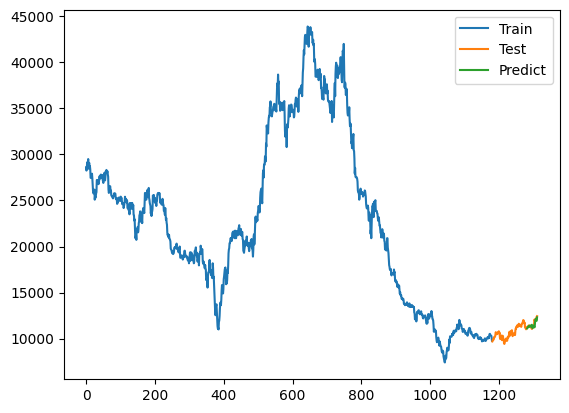

In [3]:
# 14.Vẽ hình
# Train
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
# Test
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
# Dự đoán trên tập test
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

# Dự đoán trong 30, 60, 90 ngày tiếp theo


In [4]:
x_input=test_data[30:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while i < 90:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.07774915 0.06708968 0.06896996 0.05705789 0.05517761 0.05956584
 0.06458173 0.06771736 0.06583708 0.07148065 0.06708968 0.06458173
 0.06458173 0.06959763 0.07649655 0.07649655 0.07461353 0.0802571
 0.085273   0.09154424 0.07962943 0.08402039 0.08652834 0.08966396
 0.09405219 0.09279684 0.09593246 0.08590067 0.07837682 0.08464532
 0.085273   0.08652834 0.085273   0.08402039 0.08464532 0.08151244
 0.09530479 0.10157603 0.10070716 0.106496   0.10553119 0.11035522
 0.1060136  0.1074608  0.1069784  0.1127645  0.11517652 0.11421171
 0.1132469  0.10794321 0.10842561 0.10939042 0.10939042 0.1060136
 0.11372931 0.11421171 0.11662373 0.12000055 0.11951814 0.12627179
 0.12482458 0.12096535 0.11614132 0.11855334 0.10456639 0.10408398
 0.10167197 0.09877755 0.10167197 0.10311918 0.1060136  0.10504879
 0.10504879 0.106496   0.10939042 0.11035522 0.10939042 0.106496
 0.106496   0.10504879 0.1074608  0.10987282 0.10890801 0.10167197
 0.09974235 0.10504879 0.10553119 0.10842561 0.1045663

3 day output [[0.15181316]]
4 day input [0.05517761 0.05956584 0.06458173 0.06771736 0.06583708 0.07148065
 0.06708968 0.06458173 0.06458173 0.06959763 0.07649655 0.07649655
 0.07461353 0.0802571  0.085273   0.09154424 0.07962943 0.08402039
 0.08652834 0.08966396 0.09405219 0.09279684 0.09593246 0.08590067
 0.07837682 0.08464532 0.085273   0.08652834 0.085273   0.08402039
 0.08464532 0.08151244 0.09530479 0.10157603 0.10070716 0.106496
 0.10553119 0.11035522 0.1060136  0.1074608  0.1069784  0.1127645
 0.11517652 0.11421171 0.1132469  0.10794321 0.10842561 0.10939042
 0.10939042 0.1060136  0.11372931 0.11421171 0.11662373 0.12000055
 0.11951814 0.12627179 0.12482458 0.12096535 0.11614132 0.11855334
 0.10456639 0.10408398 0.10167197 0.09877755 0.10167197 0.10311918
 0.1060136  0.10504879 0.10504879 0.106496   0.10939042 0.11035522
 0.10939042 0.106496   0.106496   0.10504879 0.1074608  0.10987282
 0.10890801 0.10167197 0.09974235 0.10504879 0.10553119 0.10842561
 0.10456639 0.10408398 0.

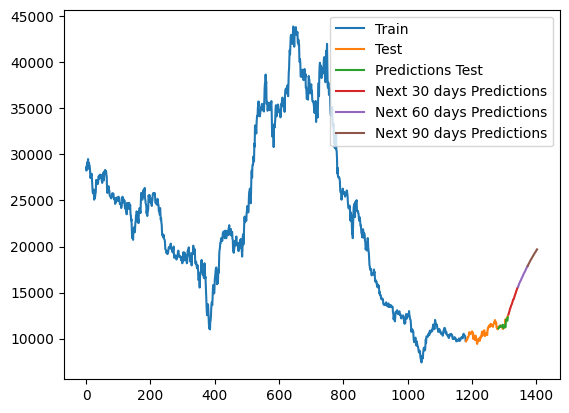

In [5]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

next_30_days_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+30, stop=len(df1)+60, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+60, stop=len(df1)+90, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))


plt.legend(['Train','Test','Predictions Test','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()



In [6]:
print(scaler.inverse_transform(lst_output))

[[12623.2804998 ]
 [12699.89819674]
 [12866.1551904 ]
 [12950.55148827]
 [13114.25222098]
 [13267.1032515 ]
 [13307.2901526 ]
 [13408.71858554]
 [13549.90497659]
 [13640.90775745]
 [13702.1221066 ]
 [13798.58045499]
 [13905.01865922]
 [14023.77225672]
 [14159.11817323]
 [14255.28784137]
 [14256.77092938]
 [14349.35356866]
 [14479.60816579]
 [14562.09623824]
 [14689.49828302]
 [14805.08727078]
 [14886.53750782]
 [15006.02830009]
 [15124.62967448]
 [15200.31609218]
 [15315.24780231]
 [15438.9508255 ]
 [15501.93911754]
 [15553.73738002]
 [15621.52668022]
 [15714.47846054]
 [15808.60616438]
 [15932.83218269]
 [16016.95393531]
 [16078.23624121]
 [16173.20225947]
 [16242.20282071]
 [16295.31455116]
 [16377.80425458]
 [16445.85015945]
 [16546.60881071]
 [16614.49596863]
 [16681.5676456 ]
 [16754.51730924]
 [16832.16196852]
 [16917.10790055]
 [17010.34999208]
 [17072.79082458]
 [17137.05181055]
 [17199.81774812]
 [17260.08396475]
 [17325.41921096]
 [17403.89131157]
 [17491.33805184]
 [17566.79